## Persiapan & Download Data

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sahilunu","key":"fc7695e7ded595d13300ca62870360e7"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import pandas as pd
import numpy as np

# Download dataset
!kaggle datasets download -d hernan4444/anime-recommendation-database-2020
!unzip anime-recommendation-database-2020.zip

Dataset URL: https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020
License(s): CC0-1.0
 96% 637M/661M [00:01<00:00, 259MB/s]
100% 661M/661M [00:01<00:00, 376MB/s]
Archive:  anime-recommendation-database-2020.zip
  inflating: anime.csv               
  inflating: anime_with_synopsis.csv  
  inflating: animelist.csv           
  inflating: html folder/html/1/details.html  
  inflating: html folder/html/1/pictures.html  
  inflating: html folder/html/1/recomendations.html  
  inflating: html folder/html/1/reviews_1.html  
  inflating: html folder/html/1/reviews_10.html  
  inflating: html folder/html/1/reviews_11.html  
  inflating: html folder/html/1/reviews_12.html  
  inflating: html folder/html/1/reviews_13.html  
  inflating: html folder/html/1/reviews_14.html  
  inflating: html folder/html/1/reviews_15.html  
  inflating: html folder/html/1/reviews_16.html  
  inflating: html folder/html/1/reviews_17.html  
  inflating: html folder/html/1/reviews_18.html  
 

##Data Understanding

In [4]:
import pandas as pd

# Membaca semua file utama yang ada di dataset
anime = pd.read_csv('anime.csv')
anime_with_synopsis = pd.read_csv('anime_with_synopsis.csv')
animelist = pd.read_csv('animelist.csv')
rating_complete = pd.read_csv('rating_complete.csv')
watching_status = pd.read_csv('watching_status.csv')

# Print jumlah data unik untuk masing-masing file
print('Jumlah data judul anime (anime.csv): ', len(anime.MAL_ID.unique()))
print('Jumlah data anime dengan sinopsis: ', len(anime_with_synopsis.MAL_ID.unique()))
print('Jumlah data list anime user (animelist): ', len(animelist.user_id.unique()))
print('Jumlah data rating lengkap: ', len(rating_complete.user_id.unique()))
print('Jumlah kategori status menonton: ', len(watching_status.status.unique()))

Jumlah data judul anime (anime.csv):  17562
Jumlah data anime dengan sinopsis:  16214
Jumlah data list anime user (animelist):  325770
Jumlah data rating lengkap:  310059
Jumlah kategori status menonton:  5


## Univariate EDA

In [6]:
# Cek info dari dataframe anime
print("--- Info Data Anime ---")
anime.info()

# Cek jumlah genre unik dan daftar genrenya
print('\nBanyak tipe genre: ', len(anime.Genres.unique()))
print('Tipe genre: ', anime.Genres.unique())

--- Info Data Anime ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Me

In [7]:
# Melihat 5 data teratas dari rating_complete
print("\n--- 5 Data Teratas Rating ---")
print(rating_complete.head())

# Melihat statistik deskriptif dari rating
print('\n--- Statistik Rating ---')
print(rating_complete.rating.describe())


--- 5 Data Teratas Rating ---
   user_id  anime_id  rating
0        0       430       9
1        0      1004       5
2        0      3010       7
3        0       570       7
4        0      2762       9

--- Statistik Rating ---
count    5.763328e+07
mean     7.510789e+00
std      1.697722e+00
min      1.000000e+00
25%      7.000000e+00
50%      8.000000e+00
75%      9.000000e+00
max      1.000000e+01
Name: rating, dtype: float64


## Data Preprocessing

In [8]:
import numpy as np

# 1. Mengambil sampel 50.000 data rating agar proses lancar
rating_sample = rating_complete.sample(n=50000, random_state=42)

# 2. Menggabungkan data rating dengan info nama & genre dari file anime
all_anime_name = pd.merge(rating_sample, anime[['MAL_ID', 'Name', 'Genres']],
                          left_on='anime_id', right_on='MAL_ID', how='left')

# Tampilkan 5 data teratas hasil gabungan
all_anime_name.head()

,user_id,anime_id,rating,MAL_ID,Name,Genres
0,255419,4059,7,4059,"Clannad: Mou Hitotsu no Sekai, Tomoyo-hen","Drama, Romance, School, Slice of Life"
1,206382,10793,7,10793,Guilty Crown,"Action, Sci-Fi, Super Power, Drama, Romance, M..."
2,245012,34246,4,34246,Kimi no Mana wa Rina Witch,Hentai
3,277697,5030,7,5030,Maria†Holic,"Comedy, Parody, School, Shoujo Ai"
4,329602,227,7,227,FLCL,"Action, Sci-Fi, Comedy, Parody, Dementia, Psyc..."


## Data Preparation

In [9]:
# Cek missing value
print("Jumlah missing value:")
print(all_anime_name.isnull().sum())

# Jika ada yang kosong hapus
all_anime_clean = all_anime_name.dropna()

Jumlah missing value:
user_id     0
anime_id    0
rating      0
MAL_ID      0
Name        0
Genres      0
dtype: int64


In [10]:
# Mengurutkan data berdasarkan ID
fix_anime = all_anime_clean.sort_values('MAL_ID', ascending=True)

# Menghapus data duplikat pada kolom MAL_ID
preparation = fix_anime.drop_duplicates('MAL_ID')
preparation

,user_id,anime_id,rating,MAL_ID,Name,Genres
28705,344581,1,10,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
5752,120915,5,9,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
6619,230512,6,10,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
35578,332693,7,8,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
26460,74055,8,8,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...,...,...,...,...
16531,334776,46491,4,46491,Santa Company: Manatsu no Merry Christmas,Fantasy
45921,346886,47307,5,47307,Shin Gengou Nyankogelion,"Sci-Fi, Music, Mecha"
46817,325051,47398,6,47398,Kimetsu Gakuen: Valentine-hen,Comedy
40858,306516,47402,9,47402,Heikousen,"Music, Romance"


In [11]:
# Mengonversi data series menjadi list
anime_id = preparation['MAL_ID'].tolist()
anime_name = preparation['Name'].tolist()
anime_genre = preparation['Genres'].tolist()

print('Jumlah ID Anime:', len(anime_id))
print('Jumlah Nama Anime:', len(anime_name))
print('Jumlah Genre Anime:', len(anime_genre))

Jumlah ID Anime: 6324
Jumlah Nama Anime: 6324
Jumlah Genre Anime: 6324


In [12]:
# Membuat dataframe baru
anime_new = pd.DataFrame({
    'id': anime_id,
    'anime_name': anime_name,
    'genre': anime_genre
})
anime_new.head()

,id,anime_name,genre
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"


## Model Development

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(anime_new['genre'])

# Menampilkan nama-nama fitur genre yang ditemukan
print(tf.get_feature_names_out())

['action' 'adventure' 'ai' 'arts' 'cars' 'comedy' 'dementia' 'demons'
 'drama' 'ecchi' 'fantasy' 'fi' 'game' 'harem' 'hentai' 'historical'
 'horror' 'josei' 'kids' 'life' 'magic' 'martial' 'mecha' 'military'
 'music' 'mystery' 'of' 'parody' 'police' 'power' 'psychological'
 'romance' 'samurai' 'school' 'sci' 'seinen' 'shoujo' 'shounen' 'slice'
 'space' 'sports' 'super' 'supernatural' 'thriller' 'unknown' 'vampire'
 'yaoi' 'yuri']


In [14]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(anime_new['genre'])

# Melihat ukuran matrix tf-idf
tfidf_matrix.shape

(6324, 48)

In [15]:
# Membuat dataframe untuk melihat matriks tf-idf
# Kolom diisi dengan jenis genre, baris diisi dengan nama anime
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=anime_new.anime_name
).sample(22, axis=1).sample(10, axis=0)

,cars,slice,comedy,police,horror,life,shoujo,fantasy,harem,samurai,...,vampire,unknown,military,mecha,music,dementia,adventure,josei,hentai,game
anime_name,,,,,,,,,,,,,,,,,,,,,
Naruto: The Cross Roads,0.0,0.00000,0.394474,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.565722,0.000000,0.0,0.0
Sakamichi no Apollon,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.461087,0.0,0.000000,0.684854,0.0,0.0
Honoo no Haramase Paidol My★Star Gakuen Z The Animation,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.0
Tensei shitara Slime Datta Ken OVA,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.694205,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
Aura: Maryuuin Kouga Saigo no Tatakai,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
"Kirai, Demo, Suki",0.0,0.00000,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.709609,0.0,0.000000,0.000000,0.0,0.0
Golden Time,0.0,0.00000,0.449084,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
Umi ga Kikoeru,0.0,0.43217,0.000000,0.0,0.0,0.43217,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
Lupin III: Russia yori Ai wo Komete,0.0,0.00000,0.289325,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.414926,0.000000,0.0,0.0


## Cosine Similarity

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.79143963, 0.73514765, ..., 0.2481762 , 0.        ,
        0.        ],
       [0.79143963, 1.        , 0.50733315, ..., 0.        , 0.        ,
        0.20000799],
       [0.73514765, 0.50733315, 1.        , ..., 0.28316105, 0.        ,
        0.1206704 ],
       ...,
       [0.2481762 , 0.        , 0.28316105, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.20000799, 0.1206704 , ..., 0.        , 0.        ,
        1.        ]])

In [17]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=anime_new['anime_name'], columns=anime_new['anime_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat matriks kesamaan
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (6324, 6324)


anime_name,Quanzhi Fashi II,Anata no Shiranai Kangofu: Seiteki Byoutou 24 Ji,Shakugan no Shana Movie,Kurenai no Buta,Drifters
anime_name,,,,,
Babylon,0.000000,0.000000,0.000000,0.000000,0.000000
Black Cat (TV),0.000000,0.000000,0.000000,0.171665,0.153198
Neo-Aspect,0.000000,0.000000,0.000000,0.000000,0.000000
Toshi Densetsu Monogatari Hikiko,0.000000,0.000000,0.000000,0.000000,0.000000
Asura Cryin',0.162502,0.000000,0.583186,0.116115,0.103624
Feng Ji Yun Nu,0.123448,0.000000,0.153730,0.088209,0.078720
Rosario to Vampire Capu2,0.291612,0.000000,0.162078,0.151482,0.127367
Ikoku Meiro no Croisée The Animation,0.000000,0.000000,0.000000,0.268461,0.431855
Shin Taketori Monogatari: 1000-nen Joou,0.000000,0.000000,0.000000,0.144604,0.000000


##Mendapatkan Rekomendasi

In [18]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=anime_new[['anime_name', 'genre']], k=5):
    """
    Rekomendasi Anime berdasarkan kemiripan dataframe

    Parameter:
    ---
    nama_anime : tipe data string (str)
                Nama Anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Dataframe similarity, simetrik, dengan anime sebagai indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua definisi dan fitur lainnya digunakan untuk mendefinisikan kemiripan
    k : tipe data int
        Jumlah rekomendasi yang diberikan
    ---
    """

    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    closest = similarity_data.loc[nama_anime].to_numpy().argpartition(
        range(-1, -k, -1)
    )

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest_indices = closest[-1:-(k+2):-1]

    # Drop nama_anime agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest_indices = [i for i in closest_indices if similarity_data.index[i] != nama_anime]

    # Return data frame dari items
    return items.iloc[closest_indices[:k]]

In [19]:
# Cek dulu genre anime yang mau kita jadikan acuan (misal: Naruto)
anime_new[anime_new.anime_name.eq('Naruto')]

,id,anime_name,genre
10,20,Naruto,"Action, Adventure, Comedy, Super Power, Martia..."


In [20]:
# Memanggil fungsi rekomendasi
# Ganti 'Naruto' dengan judul lain yang ada di dataset lo kalau mau coba yang lain
anime_recommendations('Naruto')

,anime_name,genre
1185,Naruto: Shippuuden,"Action, Adventure, Comedy, Super Power, Martia..."
3439,Naruto: Shippuuden Movie 6 - Road to Ninja,"Action, Adventure, Super Power, Martial Arts, ..."
3110,Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...,"Action, Adventure, Martial Arts, Shounen, Supe..."
728,Dragon Ball GT: Gokuu Gaiden! Yuuki no Akashi ...,"Action, Adventure, Comedy, Super Power, Martia..."
2495,Dragon Ball Z: Atsumare! Gokuu World,"Action, Adventure, Comedy, Super Power, Martia..."


## Model Development - Collaborative Filtering

In [23]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

# Kita pakai data 'rating_sample' yang sudah kita buat tadi (biar tidak berat)
df = rating_sample

# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

# Melakukan hal yang sama untuk anime_id
anime_ids = df['anime_id'].unique().tolist()
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

# Memetakan user_id dan anime_id ke dataframe yang berkaitan
df['user'] = df['user_id'].map(user_to_user_encoded)
df['anime'] = df['anime_id'].map(anime_to_anime_encoded)

In [24]:
# Mendapatkan jumlah user dan anime
num_users = len(user_to_user_encoded)
num_anime = len(anime_to_anime_encoded)

# Mengubah rating menjadi float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum dan maksimum rating
min_rating = min(df['rating'])
max_rating = max(df['rating'])

print(f'Number of User: {num_users}, Number of Anime: {num_anime}, Min Rating: {min_rating}, Max Rating: {max_rating}')

# Mengacak dataset
df = df.sample(frac=1, random_state=42)

# Membuat variabel x untuk input dan y untuk target
x = df[['user', 'anime']].values
y = (df['rating'] - min_rating) / (max_rating - min_rating) # Normalisasi rating

# Membagi data menjadi 80% train dan 20% test
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

Number of User: 41652, Number of Anime: 6324, Min Rating: 1.0, Max Rating: 10.0


In [25]:
class RecommenderNet(tf.keras.Model):
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embedding anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [26]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Memulai proses training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 20,
    validation_data = (x_val, y_val)
)

Epoch 1/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.6809 - root_mean_squared_error: 0.2836 - val_loss: 0.6467 - val_root_mean_squared_error: 0.2484
Epoch 2/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.5966 - root_mean_squared_error: 0.1976 - val_loss: 0.6309 - val_root_mean_squared_error: 0.2305
Epoch 3/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.5858 - root_mean_squared_error: 0.1813 - val_loss: 0.6252 - val_root_mean_squared_error: 0.2252
Epoch 4/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.5743 - root_mean_squared_error: 0.1698 - val_loss: 0.6171 - val_root_mean_squared_error: 0.2166
Epoch 5/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.5666 - root_mean_squared_error: 0.1610 - val_loss: 0.6119 - val_root_mean_squared_error: 0.2113
Epoch 6/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.5630 - root_mean_squared_error: 0.1569 - val_loss: 0.6070 - val_root_mean_squared_error: 0.2062
Epoch 7/20
5000/5000 ━━━━━━━━━━━━━

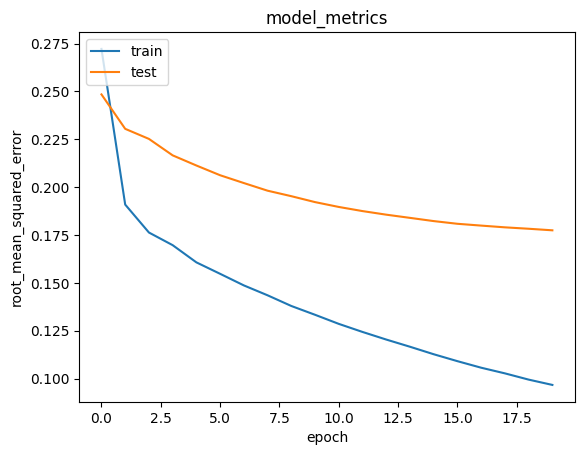

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Menyiapkan variabel untuk testing
anime_df = anime_new
df = pd.read_csv('rating_complete.csv').sample(n=50000, random_state=42) # samakan dengan sample awal

# Mengambil sample user secara acak
user_id = df.user_id.sample(1).iloc[0]
anime_visited_by_user = df[df.user_id == user_id]

# Membuat daftar anime yang belum pernah ditonton oleh user
anime_not_visited = anime_df[~anime_df['id'].isin(anime_visited_by_user.anime_id.values)]['id']
anime_not_visited = list(
    set(anime_not_visited)
    .intersection(set(anime_to_anime_encoded.keys()))
)

anime_not_visited = [[anime_to_anime_encoded.get(x)] for x in anime_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_visited), anime_not_visited)
)

# Melakukan prediksi skor rating untuk anime yang belum ditonton
ratings = model.predict(user_anime_array).flatten()

# Mengambil 10 rekomendasi tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)

top_anime_user = (
    anime_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.anime_name, ':', row.genre)

print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)

recommended_anime = anime_df[anime_df['id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.anime_name, ':', row.genre)

198/198 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Showing recommendations for users: 165066
Anime with high ratings from user
--------------------------------
Kamisama Hajimemashita : Comedy, Demons, Supernatural, Romance, Fantasy, Shoujo
--------------------------------
Top 10 anime recommendation
--------------------------------
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Aria the Origination : Sci-Fi, Slice of Life, Fantasy, Shounen
Fullmetal Alchemist: Brotherhood : Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen
Gintama' : Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Shounen
Hunter x Hunter (2011) : Action, Adventure, Fantasy, Shounen, Super Power
Uchuu Kyoudai : Comedy, Sci-Fi, Seinen, Slice of Life, Space
Mushishi Zoku Shou : Adventure, Slice of Life, Mystery, Historical, Supernatural, Fantasy, Seinen
Koe no Katachi : Drama, School, Shounen
Gintama° : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Gintama. : Action, Com